In [1]:
#Se importa la librería tweepy
import tweepy

In [2]:
#Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Se define las variables para el acceso al API de twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [4]:
#Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
#se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

Ernesto Crespo


Devuelve el nombre del usuario de la cuenta twitter que se está usando

In [6]:
#Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")

In [7]:
#Se define la cantida de tweets a capturar
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))

In [8]:
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")

In [9]:
def ObtenerTweets(palabra="Trump",times=100,leguanje="en"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)


In [10]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()
    

In [11]:
numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

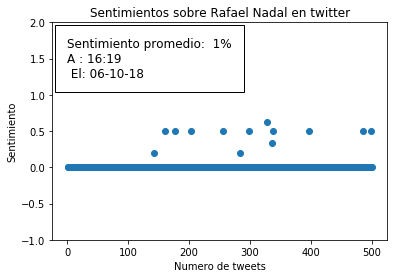

In [12]:
GraficarDatos(numeros_list,popularidad_list,numero)